# Gradient Boosting (Regression)

In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('encoded_selected_columns.csv')
data.head()

,Id,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice,BsmtHasBath
0,1,3,65.0,8450,3,4,5,2,0,5,...,0,0,0,0,1,2,8,4,208500,1
1,2,3,80.0,9600,3,2,24,1,0,2,...,0,0,0,0,1,5,8,4,181500,1
2,3,3,68.0,11250,0,4,5,2,0,5,...,0,0,0,0,1,9,8,4,223500,1
3,4,3,60.0,9550,0,0,6,2,0,5,...,272,0,0,0,1,2,8,0,140000,1
4,5,3,84.0,14260,0,2,15,2,0,5,...,0,0,0,0,1,12,8,4,250000,1


In [4]:
X= data.drop(['Id', 'SalePrice'], axis = 1)
Y = pd.DataFrame(data.SalePrice)

In [5]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
gbm = GradientBoostingRegressor() 

In [7]:
gbm.fit(X,Y) 

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
gbm.score(X,Y) # before train_test_split (baseline model)

0.9629156893470299

In [9]:
gbm.set_params(learning_rate=0.01, n_estimators=1500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)
gbm.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1  6372977871.4559    57758349.1197            8.35s
         2  6846526416.7182    51742303.8331            5.57s
         3  6322273567.3113    43487775.7877            4.63s
         4  6552663697.3956    17062492.9877            4.18s
         5  5434074035.9027    69837480.5516            3.73s
         6  5981878862.5435    20886368.9951            3.36s
         7  5208887849.5910    58917350.9329            3.09s
         8  5980148179.1497    25791580.8383            2.89s
         9  6063621634.8303    49970228.2337            2.73s
        10  5365428671.3505    26042248.9978            2.66s
        20  4916819380.7405    15031374.6594            1.92s
        30  5658636542.8769    30216647.4445            1.57s
        40  5286816830.0226    20749014.2280            1.44s
        50  4538446000.4466    40884088.7166            1.32s
        60  4636640848.1742    25763402.9334            1.24s
       

In [10]:
gbm.set_params(learning_rate=0.01, n_estimators=1500, max_depth=2, max_features=2, subsample=1.0, warm_start=False)
gbm.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1  6255463084.3083            1.63s
         2  6188038941.2169            2.41s
         3  6166781037.5652            2.47s
         4  6118218381.2203            2.52s
         5  6077400830.1139            3.03s
         6  6029003157.0003            2.94s
         7  5987102599.7131            2.78s
         8  5929828632.3758            2.67s
         9  5879978857.1631            2.56s
        10  5828073082.1848            2.41s
        20  5471604368.2321            1.50s
        30  5100233706.0000            1.33s
        40  4743169490.2961            1.20s
        50  4436273438.0433            1.09s
        60  4118079190.0587            1.05s
        70  3837190335.9773            1.00s
        80  3586900852.6383            0.95s
        90  3357676996.8700            0.92s
       100  3168652591.5804            0.88s
       200  1812028814.1818            0.69s
       300  1156980871.9447            0.60s


/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       400   835194416.3247            0.54s
       500   648271601.0292            0.49s
       600   531280208.1615            0.42s
       700   450544086.9450            0.37s
       800   400825040.2847            0.32s
       900   361963512.1864            0.27s
      1000   333890548.8358            0.22s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=2, max_leaf_nodes=None,
                          min_impurity_decrease=0.01, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [11]:
# from sklearn.metrics import r2_score
# # The staged_predict returns generators

# gen_train = gbm.staged_predict(X_train)
# gen_test  = gbm.staged_predict(X_test)

# trainR2 = []
# testR2  = []
# steps   = range(1,5000)
# for n in steps:
#     y_pred_train = next(gen_train)
#     y_pred_test  = next(gen_test)
#     trainR2.append(r2_score(y_pred_train, Y_train))
#     testR2.append(r2_score(y_pred_test, Y_test))

StopIteration: 

In [ ]:
start = 4000
plt.plot(steps[start:], trainR2[start:],label='train')
plt.plot(steps[start:], testR2[start:],label='test')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

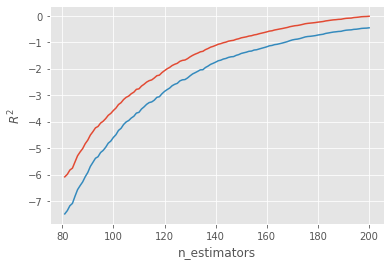

In [12]:
start = 80
end   = 200
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

In [13]:
sorted_importance = sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance.loc[0:10]

[('GrLivArea', 0.11909770966772121),
 ('TotalBsmtSF', 0.07119019755065471),
 ('OverallQual', 0.05495045509439625),
 ('KitchenQual', 0.0549136581813063),
 ('GarageCars', 0.04920843223134618),
 ('LotArea', 0.0460108092822843),
 ('FullBath', 0.04235968383227325),
 ('YearBuilt', 0.04170653412369988),
 ('ExterQual', 0.04044443603247096),
 ('BsmtQual', 0.04021985882021836),
 ('2ndFlrSF', 0.034672097838842515),
 ('1stFlrSF', 0.028116804766846023),
 ('TotRmsAbvGrd', 0.026936527105561343),
 ('OpenPorchSF', 0.02675478329818214),
 ('HeatingQC', 0.026318546555458875),
 ('Fireplaces', 0.025475358283815898),
 ('GarageType', 0.02511529524829365),
 ('Foundation', 0.022678419333273813),
 ('LotFrontage', 0.017576057708475396),
 ('FireplaceQu', 0.01647947557860076),
 ('WoodDeckSF', 0.013514167385699086),
 ('RoofStyle', 0.011743585036494178),
 ('OverallCond', 0.010879607727910391),
 ('GarageCond', 0.010103034954269006),
 ('PoolArea', 0.010052242108201433),
 ('MSZoning', 0.009798882959792416),
 ('HalfBath'

In [ ]:
grid_para_forest = [{
#    "n_estimators": [25, 50, 100],
#    "criterion": ["mse", "mae"],
    "min_samples_leaf": range(1, 10),
    "max_depth": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
#    "max_features": ["auto", "sqrt"],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(compiled_forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(C_train, D_train)

Text(0.5, 1.0, 'Feature Importance Plot of 1500-Tree GBM')

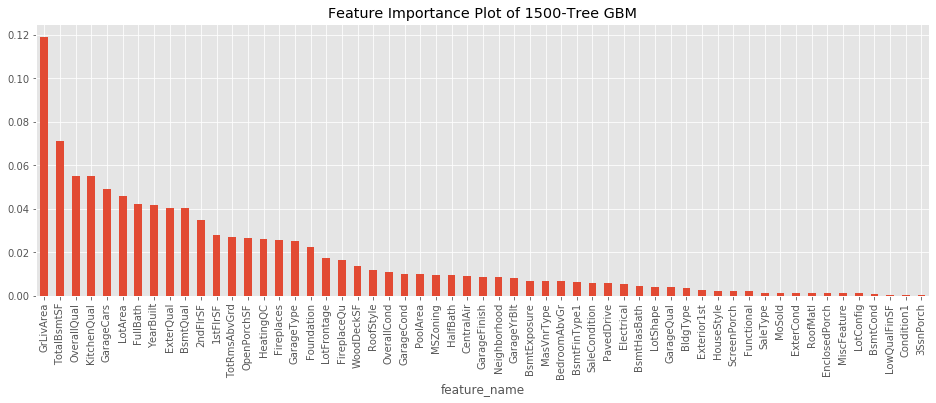

In [21]:
plt.rcParams['figure.figsize'] = (16,5)
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 1500-Tree GBM')

Text(0.5, 1.0, 'Feature Importance Plot of 1500-Tree GBM')

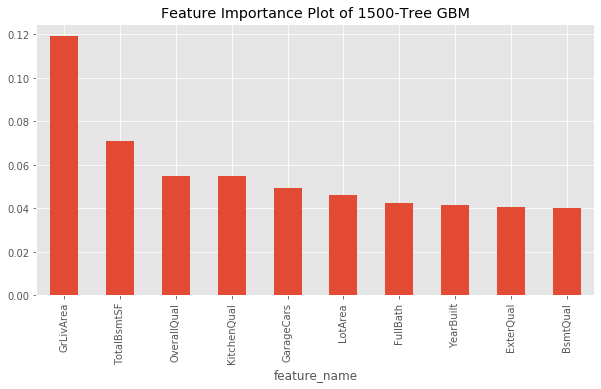

In [22]:
plt.rcParams['figure.figsize'] = (10,5)
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a[0:10], 'importance_score':b[0:10]}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 1500-Tree GBM')

In [16]:
from copy import deepcopy

gbm_models   = []
warm_start   = False
steps        = list(range(1,501,50))

for n_estimators in steps:
                gbm.set_params(n_estimators = n_estimators, learning_rate = 0.1, warm_start = warm_start)
                gbm_models.append(deepcopy(gbm.fit(X_train, Y_train))) 
                warm_start = True

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

      Iter       Train Loss   Remaining Time 
         1  5703253254.7903            0.00s
      Iter       Train Loss   Remaining Time 
         2  5152684892.7406            0.05s
         3  4768866739.4713            0.05s
         4  4379253010.0412            0.05s
         5  4065112270.8336            0.05s
         6  3927327604.8156            0.05s
         7  3771486005.7091            0.06s
         8  3632081495.9006            0.05s
         9  3332942365.7591            0.05s
        10  3264005637.3103            0.06s
        11  3076493655.7890            0.06s
        21  1894789636.6115            0.04s
        31  1317251144.7711            0.02s
        41   952761573.9124            0.01s
        51   729786413.4710            0.00s
      Iter       Train Loss   Remaining Time 
        52   726162819.2126            0.04s
        53   712155070.7380            0.04s
        54   700204778.5074            0.04s
        55   683677855.4536            0.04s
       

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

      Iter       Train Loss   Remaining Time 
       152   284088128.3528            0.07s
       153   282575002.1925            0.07s
       154   282051814.1352            0.06s
       155   280760009.0024            0.06s
       156   278717190.9718            0.06s
       157   278348079.5455            0.05s
       158   276816665.7989            0.05s
       159   275169061.8370            0.05s
       160   274225785.4693            0.05s
       161   273569304.7239            0.04s
       171   263332922.4499            0.03s
       181   252555787.8303            0.02s
       191   244189891.9474            0.01s
       201   237160594.4341            0.00s
      Iter       Train Loss   Remaining Time 
       202   235804194.3524            0.05s
       203   234473510.4164            0.04s
       204   233670192.6118            0.04s
       205   233015038.1516            0.04s
       206   232393699.7642            0.04s
       207   231366273.2932            0.04s
       2

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
Iowa_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=X_train.columns)
Iowa_importance

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,SaleType,SaleCondition,BsmtHasBath
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51,0.001210,0.031646,0.028857,0.012710,0.000000,0.011007,0.003391,0.002750,0.007955,0.002826,...,0.013426,0.000636,0.000658,0.001077,0.005870,0.000000,0.000000,0.001235,0.015407,0.006417
101,0.003879,0.030154,0.030636,0.011959,0.000139,0.011029,0.003257,0.003682,0.007828,0.006990,...,0.013338,0.000598,0.000652,0.001505,0.005983,0.000010,0.000896,0.001308,0.015104,0.006079
151,0.004460,0.030237,0.032767,0.011771,0.000152,0.012000,0.003345,0.003778,0.008037,0.007438,...,0.013658,0.000677,0.000702,0.001732,0.005952,0.000103,0.000971,0.001321,0.015113,0.006464
201,0.004501,0.030266,0.032658,0.011783,0.000392,0.012293,0.003327,0.003789,0.008122,0.007863,...,0.013718,0.000814,0.000697,0.002430,0.005905,0.000184,0.001087,0.001311,0.014994,0.006506
251,0.004640,0.030360,0.032975,0.011815,0.000406,0.012351,0.003354,0.003777,0.008084,0.008213,...,0.013679,0.000945,0.000721,0.002601,0.005875,0.000201,0.001082,0.001442,0.015045,0.006542
301,0.004755,0.030320,0.033064,0.011765,0.000432,0.012352,0.003380,0.003779,0.008087,0.008300,...,0.013741,0.001090,0.000736,0.002828,0.005851,0.000252,0.001280,0.001436,0.015163,0.006533
351,0.004738,0.030400,0.033325,0.011836,0.000437,0.012413,0.003381,0.003777,0.008093,0.008468,...,0.013710,0.001155,0.000747,0.002879,0.005830,0.000264,0.001297,0.001452,0.015156,0.006542
401,0.004735,0.030442,0.033521,0.011876,0.000440,0.012485,0.003381,0.003803,0.008111,0.008672,...,0.013718,0.001170,0.000745,0.002931,0.005814,0.000263,0.001454,0.001448,0.015132,0.006569
451,0.004805,0.030533,0.033520,0.011877,0.000448,0.012512,0.003380,0.003800,0.008099,0.008710,...,0.013894,0.001181,0.000783,0.002936,0.005801,0.000281,0.001537,0.001453,0.015136,0.006583


Text(0, 0.5, 'feature importance')

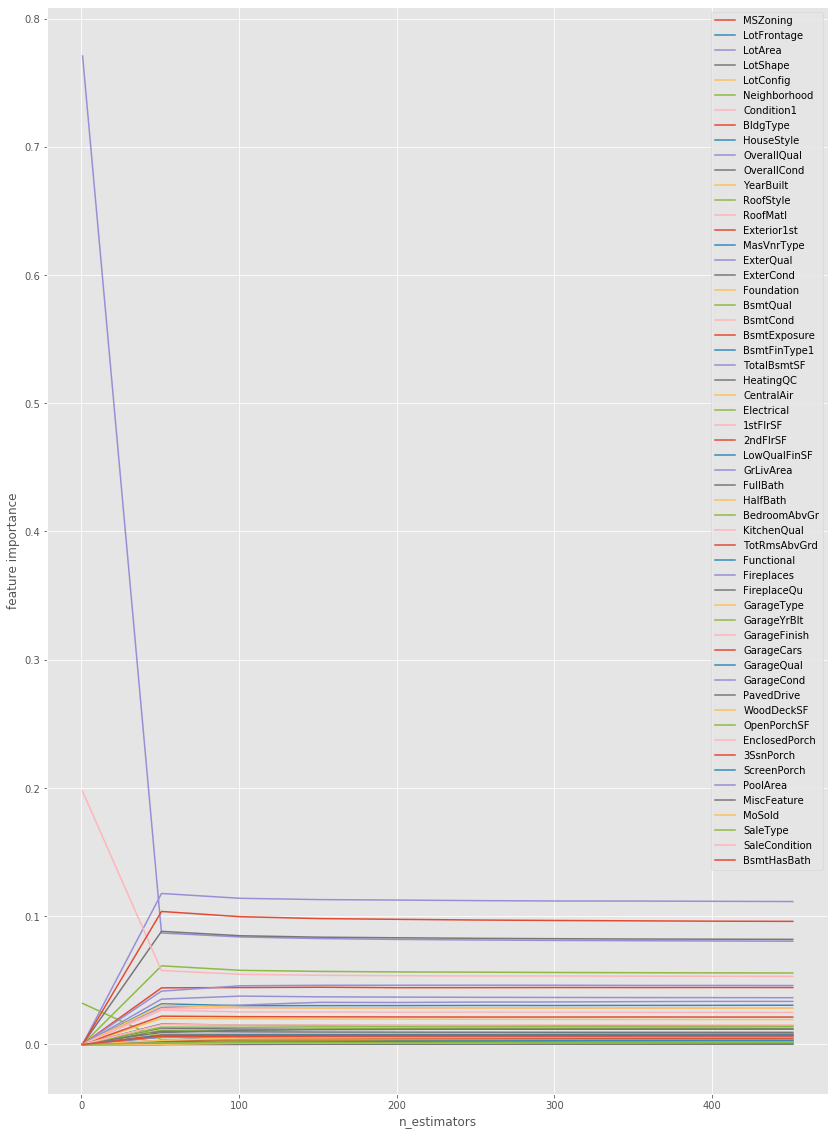

In [18]:
plt.rcParams['figure.figsize'] = (14,20)
for feature in Iowa_importance.columns:
    plt.plot(Iowa_importance.index, Iowa_importance[feature], label=feature)
    
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')